Vader lexicon is ready.
Loading mock historical sentiment data (FNSPID)...
Fetching historical stock data for NVDA...

Training the model on long-term historical data...


/var/folders/st/8z9yjrgn4fq_j2pyt73wn7d00000gn/T/ipykernel_9528/432879357.py:55: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df_hist = yf.download(TICKER_TO_PREDICT, start=HISTORICAL_START, end=HISTORICAL_END, progress=False)
/var/folders/st/8z9yjrgn4fq_j2pyt73wn7d00000gn/T/ipykernel_9528/432879357.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_df_hist['sentiment'].fillna(method='ffill', inplace=True)
/var/folders/st/8z9yjrgn4fq_j2pyt73wn7d00000gn/T/ipykernel_9528/432879357

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0093
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022
Epoch 9/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019
Epoch 10/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 11/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 12/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019
Epoch 13/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016
Epoch 14/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 15/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014   
Epoch 16/30
39/3

/var/folders/st/8z9yjrgn4fq_j2pyt73wn7d00000gn/T/ipykernel_9528/432879357.py:109: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df_recent = yf.download(TICKER_TO_PREDICT, start=RECENT_START, end=RECENT_END, progress=False)


Making predictions on recent data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


/var/folders/st/8z9yjrgn4fq_j2pyt73wn7d00000gn/T/ipykernel_9528/432879357.py:127: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_df_recent['sentiment'].fillna(method='ffill', inplace=True)
/var/folders/st/8z9yjrgn4fq_j2pyt73wn7d00000gn/T/ipykernel_9528/432879357.py:127: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_df_recent['sentiment'].fillna(method='ffill', inplace=True)
/var/folders/st/8z9yjrgn4fq_j2pyt73wn7d00000gn/T/ipyker

Plotting results...


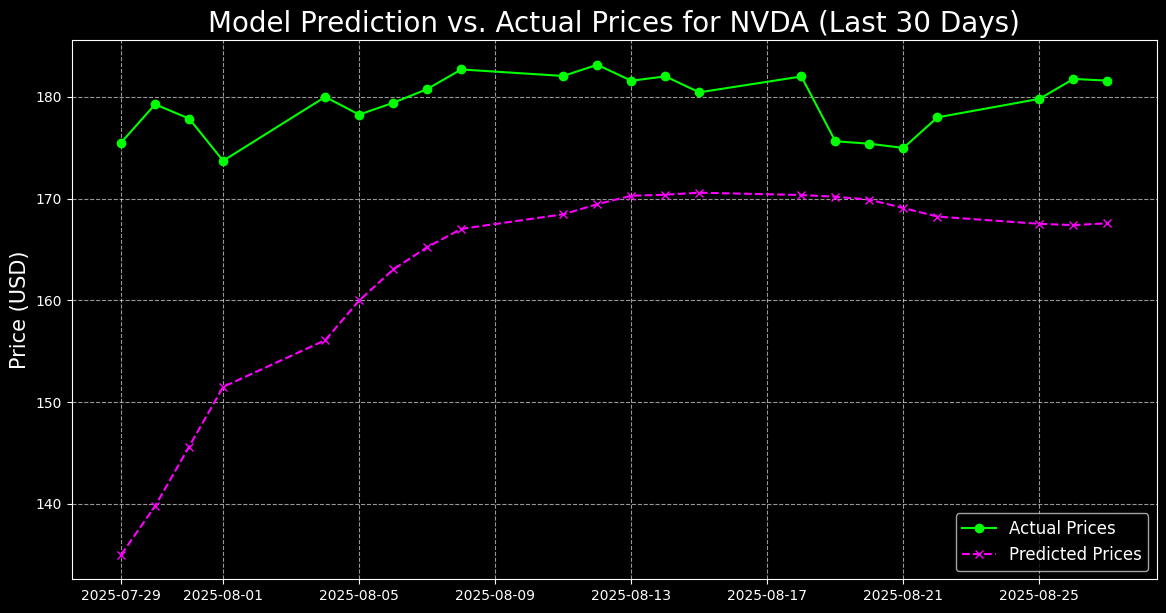

In [33]:
import pandas as pd
import numpy as np
import yfinance as yf
from gnews import GNews
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
from datetime import date, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- 1. CONFIGURATION ---
TICKER_TO_PREDICT = 'NVDA'
COMPANY_NAME = 'Nvidia'
LOOK_BACK = 15  # Number of past days the model looks at (kept small for speed)
EPOCHS = 30     # Number of times the model trains on the data

# --- 2. SETUP & MOCK DATA ---

def setup_nltk():
    """Checks for and downloads the VADER lexicon if needed."""
    try:
        nltk.data.find('sentiment/vader_lexicon.zip')
    except LookupError:
        print("Vader lexicon not found. Downloading...")
        nltk.download('vader_lexicon')
    print("Vader lexicon is ready.")

def create_mock_fnspid_data():
    """
    Creates a mock DataFrame to simulate loading a historical sentiment dataset.
    This represents your long-term FNSPID data.
    """
    print("Loading mock historical sentiment data (FNSPID)...")
    date_range = pd.date_range(start="2020-01-01", end="2024-12-31", freq='D')
    # Simulate random sentiment scores
    sentiment = np.random.uniform(-0.5, 0.5, size=len(date_range))
    mock_df = pd.DataFrame(data={'sentiment': sentiment}, index=date_range)
    return mock_df

# --- 3. HISTORICAL DATA COLLECTION & TRAINING ---

# Setup NLTK
setup_nltk()

# Load historical sentiment data
historical_sentiment_df = create_mock_fnspid_data()
HISTORICAL_START = historical_sentiment_df.index.min()
HISTORICAL_END = historical_sentiment_df.index.max()

# Fetch long-term stock data to match the sentiment data
print(f"Fetching historical stock data for {TICKER_TO_PREDICT}...")
stock_df_hist = yf.download(TICKER_TO_PREDICT, start=HISTORICAL_START, end=HISTORICAL_END, progress=False)

# !!! THIS IS THE CRITICAL FIX !!!
# Flatten the multi-level column index if it exists
if isinstance(stock_df_hist.columns, pd.MultiIndex):
    stock_df_hist.columns = stock_df_hist.columns.droplevel(1)

# Join the historical sentiment data
stock_df_hist = stock_df_hist.join(historical_sentiment_df, how='left')
stock_df_hist['sentiment'].fillna(method='ffill', inplace=True)
stock_df_hist['sentiment'].fillna(0, inplace=True)


# Prepare data for the LSTM model
feature_columns = ['Close', 'Open', 'High', 'Low', 'Volume', 'sentiment']
historical_data = stock_df_hist[feature_columns].values

# Scale the historical data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_historical_data = scaler.fit_transform(historical_data)

scaler_price = MinMaxScaler(feature_range=(0, 1))
scaler_price.fit_transform(stock_df_hist[['Close']])

# Create training sequences from the entire historical dataset
X_train, y_train = [], []
for i in range(LOOK_BACK, len(scaled_historical_data)):
    X_train.append(scaled_historical_data[i-LOOK_BACK:i])
    y_train.append(scaled_historical_data[i, 0]) # 0 is the index of 'Close' price

X_train, y_train = np.array(X_train), np.array(y_train)

# Build the LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
print("\nTraining the model on long-term historical data...")
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32)
print("Model training complete.")

# --- 4. RECENT DATA COLLECTION FOR TESTING ---

print("\nFetching recent 30 days of data for testing...")
RECENT_END = date.today()
RECENT_START = RECENT_END - timedelta(days=30)

# Fetch recent stock data
stock_df_recent = yf.download(TICKER_TO_PREDICT, start=RECENT_START, end=RECENT_END, progress=False)

# !!! APPLY THE SAME FIX HERE !!!
# Flatten the multi-level column index if it exists
if isinstance(stock_df_recent.columns, pd.MultiIndex):
    stock_df_recent.columns = stock_df_recent.columns.droplevel(1)

# Fetch and process recent news sentiment
gnews = GNews(start_date=RECENT_START, end_date=RECENT_END)
news_articles = gnews.get_news(f'{COMPANY_NAME} stock')
if news_articles:
    news_df_recent = pd.DataFrame(news_articles)
    sia = SentimentIntensityAnalyzer()
    news_df_recent['sentiment'] = news_df_recent['title'].apply(lambda title: sia.polarity_scores(title)['compound'])
    news_df_recent['date'] = pd.to_datetime(news_df_recent['published date']).dt.date
    daily_sentiment_recent = news_df_recent.groupby('date')['sentiment'].mean()
    daily_sentiment_recent.index = pd.to_datetime(daily_sentiment_recent.index)
    stock_df_recent = stock_df_recent.join(daily_sentiment_recent, how='left')
    stock_df_recent['sentiment'].fillna(method='ffill', inplace=True)
    stock_df_recent['sentiment'].fillna(0, inplace=True)
else:
    stock_df_recent['sentiment'] = 0.0

# --- 5. PREDICTION & EVALUATION ON RECENT DATA ---

# Combine historical and recent data to create context for prediction
full_data = pd.concat([stock_df_hist[feature_columns], stock_df_recent[feature_columns]])
test_inputs = full_data[len(full_data) - len(stock_df_recent) - LOOK_BACK:].values
test_inputs = scaler.transform(test_inputs) # Use the SAME scaler from training

# Create test sequences
X_test = []
for i in range(LOOK_BACK, len(test_inputs)):
    X_test.append(test_inputs[i-LOOK_BACK:i])
X_test = np.array(X_test)

# Make predictions
print("Making predictions on recent data...")
predictions_scaled = model.predict(X_test)
predictions = scaler_price.inverse_transform(predictions_scaled)

# Prepare data for plotting
valid = stock_df_recent.copy()
valid['Predictions'] = predictions

# --- 6. VISUALIZATION ---
print("Plotting results...")
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(valid['Close'], label='Actual Prices', color='lime', marker='o')
ax.plot(valid['Predictions'], label='Predicted Prices', color='magenta', linestyle='--', marker='x')

ax.set_title(f'Model Prediction vs. Actual Prices for {TICKER_TO_PREDICT} (Last 30 Days)', fontsize=20)
ax.set_ylabel('Price (USD)', fontsize=15)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()